In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf



2025-08-26 12:03:46.006709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756209826.210681      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756209826.267894      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_df = pd.read_csv("/kaggle/input/mitsui-commodity-prediction-challenge/train.csv")
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503


In [3]:
train_df = train_df.iloc[:, 1:].copy()
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,JPX_RSS3_Rubber_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,207.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,207.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2450.0,9523.5,1961.5,2676.5,15086.0,15440.0,15085.0,4461.5,4467.0,311.7,...,1.864661,0.598318,0.827529,0.495125,0.049224,0.072574,0.080968,0.046175,14.058107,0.041388
1913,2471.5,9519.5,1980.5,2710.5,15165.0,15509.0,15162.0,4495.0,4490.0,324.2,...,1.863539,0.594400,0.824390,0.490018,0.049409,0.072828,0.080671,0.046113,14.082236,0.041630
1914,2471.5,9533.5,1974.0,2693.0,15040.0,15477.0,15044.0,4544.5,4555.0,322.6,...,1.860067,0.595250,0.822392,0.489529,0.049095,0.073232,0.081083,0.045901,14.126606,0.041457
1915,2456.0,9500.5,1970.0,2697.5,15420.0,15752.0,15420.0,4670.0,4685.0,320.2,...,1.859624,0.597780,0.817224,0.488520,0.049205,0.073018,0.081170,0.045987,14.095322,0.041368


In [4]:
train_df.isnull().sum()


LME_AH_Close                   50
LME_CA_Close                   50
LME_PB_Close                   50
LME_ZS_Close                   50
JPX_Gold_Mini_Futures_Open    115
                             ... 
FX_NOKGBP                       0
FX_NOKCHF                       0
FX_ZARCHF                       0
FX_NOKJPY                       0
FX_ZARGBP                       0
Length: 557, dtype: int64

In [5]:
train_df.interpolate(method='linear', inplace=True)

train_df.isnull().sum()

LME_AH_Close                  0
LME_CA_Close                  0
LME_PB_Close                  0
LME_ZS_Close                  0
JPX_Gold_Mini_Futures_Open    2
                             ..
FX_NOKGBP                     0
FX_NOKCHF                     0
FX_ZARCHF                     0
FX_NOKJPY                     0
FX_ZARGBP                     0
Length: 557, dtype: int64

In [6]:
train_df.interpolate(method='linear', inplace=True)

In [7]:
display(train_df)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,JPX_RSS3_Rubber_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,207.00,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,207.00,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,2175.0,7125.0,2604.0,3386.0,4754.0,4763.0,4754.5,3459.0,3458.0,206.25,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2450.0,9523.5,1961.5,2676.5,15086.0,15440.0,15085.0,4461.5,4467.0,311.70,...,1.864661,0.598318,0.827529,0.495125,0.049224,0.072574,0.080968,0.046175,14.058107,0.041388
1913,2471.5,9519.5,1980.5,2710.5,15165.0,15509.0,15162.0,4495.0,4490.0,324.20,...,1.863539,0.594400,0.824390,0.490018,0.049409,0.072828,0.080671,0.046113,14.082236,0.041630
1914,2471.5,9533.5,1974.0,2693.0,15040.0,15477.0,15044.0,4544.5,4555.0,322.60,...,1.860067,0.595250,0.822392,0.489529,0.049095,0.073232,0.081083,0.045901,14.126606,0.041457
1915,2456.0,9500.5,1970.0,2697.5,15420.0,15752.0,15420.0,4670.0,4685.0,320.20,...,1.859624,0.597780,0.817224,0.488520,0.049205,0.073018,0.081170,0.045987,14.095322,0.041368


In [8]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

LME_AH_Close                  0
LME_CA_Close                  0
LME_PB_Close                  0
LME_ZS_Close                  0
JPX_Gold_Mini_Futures_Open    0
                             ..
FX_NOKGBP                     0
FX_NOKCHF                     0
FX_ZARCHF                     0
FX_NOKJPY                     0
FX_ZARGBP                     0
Length: 557, dtype: int64

In [9]:
display(train_df)

,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,JPX_RSS3_Rubber_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,207.00,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,207.00,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,2175.0,7125.0,2604.0,3386.0,4754.0,4763.0,4754.5,3459.0,3458.0,206.25,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
5,2152.5,7102.0,2545.0,3335.0,4780.0,4789.0,4780.0,3488.0,3490.0,205.50,...,1.687934,0.788635,0.891345,0.702946,0.067902,0.091094,0.121262,0.079708,13.899366,0.059878
6,2182.0,7153.0,2550.0,3336.0,4761.0,4769.0,4762.0,3494.0,3494.0,206.10,...,1.693386,0.780153,0.903267,0.704686,0.067266,0.091733,0.121189,0.078647,13.814825,0.059532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2450.0,9523.5,1961.5,2676.5,15086.0,15440.0,15085.0,4461.5,4467.0,311.70,...,1.864661,0.598318,0.827529,0.495125,0.049224,0.072574,0.080968,0.046175,14.058107,0.041388
1913,2471.5,9519.5,1980.5,2710.5,15165.0,15509.0,15162.0,4495.0,4490.0,324.20,...,1.863539,0.594400,0.824390,0.490018,0.049409,0.072828,0.080671,0.046113,14.082236,0.041630
1914,2471.5,9533.5,1974.0,2693.0,15040.0,15477.0,15044.0,4544.5,4555.0,322.60,...,1.860067,0.595250,0.822392,0.489529,0.049095,0.073232,0.081083,0.045901,14.126606,0.041457
1915,2456.0,9500.5,1970.0,2697.5,15420.0,15752.0,15420.0,4670.0,4685.0,320.20,...,1.859624,0.597780,0.817224,0.488520,0.049205,0.073018,0.081170,0.045987,14.095322,0.041368


In [10]:
# -------------------------
# User-adjustable settings
# -------------------------
SEQ_LEN = 60              # length of input sequence (timesteps). Typical choices: 30, 60, 90
VAL_SIZE = 0.1           # fraction used as validation (small, for fine-tuning)
MODEL_SAVE_PATH = 'lstm_multivar_best.h5'



In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



In [12]:
def create_sequences(data_scaled, seq_len):
    """
    data_scaled: np.array shaped (n_rows, n_features)
    returns X (n_samples, seq_len, n_features), y (n_samples, n_features)
    where y is the row immediately following the window.
    """
    X, y = [], []
    n_rows = data_scaled.shape[0]
    for i in range(n_rows - seq_len):
        X.append(data_scaled[i:i+seq_len])
        y.append(data_scaled[i+seq_len])
    X = np.array(X)
    y = np.array(y)
    return X, y

# 1) Convert to numpy and ensure numeric
n_rows, n_features = train_df.values.shape

# 2) Fit scaler on all feature columns (important to use same scaler for inverse transform)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_all = scaler.fit_transform(train_df.values)  # (n_rows, n_features)

# 3) Build sequences
X, y = create_sequences(scaled_all, SEQ_LEN)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)

n_samples = X.shape[0]
# 4)
# For validation, we want VAL_SIZE fraction of total samples (small)
val_count = int(math.floor(n_samples * VAL_SIZE))
if val_count < 1:
    val_count = max(1, int(math.floor(0.05 * n_samples)))  # at least 1
train_end = n_samples - val_count
if train_end < 1:
    raise ValueError("Not enough training samples after splits; reduce SEQ_LEN or VAL_SIZE/TEST_SIZE.")




In [13]:
X_train = X[:train_end]
y_train = y[:train_end]
X_val = X[train_end:train_end + val_count]
y_val = y[train_end:train_end + val_count]
print(f"Total samples (windows): {n_samples}")
print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}")
print(f"Input shape for LSTM: {X_train.shape[1:]}   Output dim: {y_train.shape[1]}")

Total samples (windows): 1855
Train: 1670, Val: 185
Input shape for LSTM: (60, 557)   Output dim: 557


In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt


import json
import math
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [15]:
  # 5) Build model
i = Input(shape = X_train[0].shape)
X = LSTM(100, return_sequences=True)(i)
X = LSTM(100, return_sequences=True)(X)
X = LSTM(100, return_sequences=True)(X)
X = LSTM(100)(X)
X = Dense(100, activation="relu")(X)
X = Dropout(0.5)(X)
X = Dense(n_features)(X)

model = Model(i, X)
model.summary()



I0000 00:00:1756209841.224070      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 557)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 100)        │       263,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 557)            │        56,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,757 (2.18 MB)

 Trainable params: 570,757 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 6) Callbacks
es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
mc = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_loss', save_best_only=True, verbose=2)

In [17]:
model.compile(optimizer="Adam",
                  loss='mse',
                  metrics=['mae'])





In [18]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[es, rlr, mc ],
    verbose=2
             
)


Epoch 1/100


I0000 00:00:1756209849.896962      99 cuda_dnn.cc:529] Loaded cuDNN version 90300



Epoch 1: val_loss improved from inf to 0.03874, saving model to lstm_multivar_best.h5
209/209 - 12s - 56ms/step - loss: 0.0429 - mae: 0.1499 - val_loss: 0.0387 - val_mae: 0.1555 - learning_rate: 0.0010
Epoch 2/100

Epoch 2: val_loss improved from 0.03874 to 0.03413, saving model to lstm_multivar_best.h5
209/209 - 3s - 15ms/step - loss: 0.0161 - mae: 0.0940 - val_loss: 0.0341 - val_mae: 0.1426 - learning_rate: 0.0010
Epoch 3/100

Epoch 3: val_loss improved from 0.03413 to 0.03124, saving model to lstm_multivar_best.h5
209/209 - 3s - 15ms/step - loss: 0.0127 - mae: 0.0826 - val_loss: 0.0312 - val_mae: 0.1362 - learning_rate: 0.0010
Epoch 4/100

Epoch 4: val_loss improved from 0.03124 to 0.02417, saving model to lstm_multivar_best.h5
209/209 - 3s - 15ms/step - loss: 0.0103 - mae: 0.0738 - val_loss: 0.0242 - val_mae: 0.1179 - learning_rate: 0.0010
Epoch 5/100

Epoch 5: val_loss improved from 0.02417 to 0.02317, saving model to lstm_multivar_best.h5
209/209 - 3s - 15ms/step - loss: 0.0102 

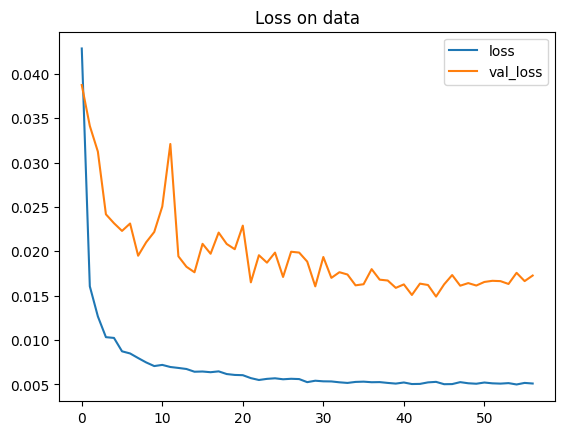

In [19]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

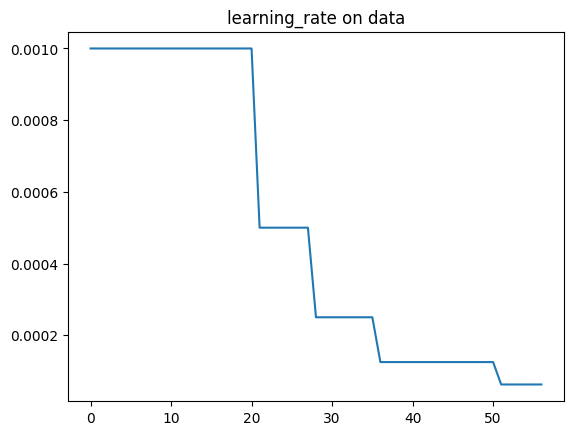

In [20]:
plt.title("learning_rate on data")
plt.plot(r.history['learning_rate'], label="loss")

plt.show()

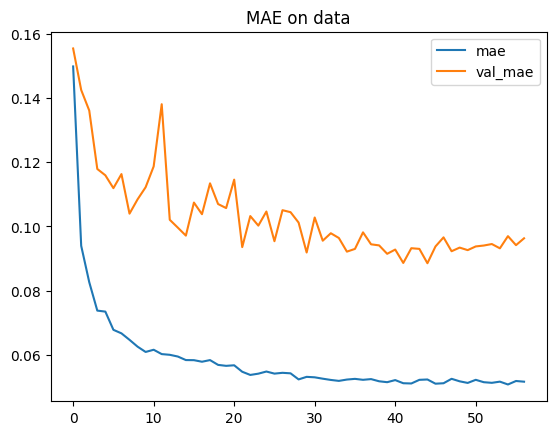

In [21]:
plt.title("MAE on data")
plt.plot(r.history['mae'], label="mae")
plt.plot(r.history['val_mae'], label="val_mae")
plt.legend()
plt.show()

In [ ]:

# ------------------------
# User settings
# ------------------------
RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

MODEL_SAVE_PATH = "lstm_tuned_best.h5"
HP_SAVE_PATH = "lstm_tuned_best_hparams.json"
MAX_EPOCHS = 120

# Search sizes / limits (fallback random search)
N_RANDOM_TRIALS = 40          # increase for broader search if needed
NO_IMPROVE_ROUNDS = 12        # stop random search if no improvement for this many trials

# Default callbacks patience
ES_PATIENCE = 12
RLR_PATIENCE = 6

# ------------------------
# You must already have these ready from your preprocessing pipeline:
# X_train, y_train, X_val, y_val
# ------------------------
try:
    X_train, y_train, X_val, y_val
except NameError:
    raise RuntimeError("Please prepare X_train, y_train, X_val, y_val before running this tuner script.")

seq_len = X_train.shape[1]
n_features = X_train.shape[2]
output_dim = y_train.shape[1]
assert output_dim == n_features, "For multi-output next-step forecasting, y should have same #features as X features."

# ------------------------
# Model builder (parametrized)
# ------------------------
def build_model_from_cfg(cfg):
    """
    cfg: dict of hyperparameters
    """
    i = Input(shape=(seq_len, n_features))
    x = i

    # stack LSTM layers
    for li in range(cfg["num_lstm_layers"]):
        units = cfg["units_per_layer"][li]
        return_sequences = (li < cfg["num_lstm_layers"] - 1)

        if cfg["bidirectional"]:
            lstm_layer = Bidirectional(LSTM(units, return_sequences=return_sequences,
                                            recurrent_dropout=cfg["recurrent_dropout"]))
        else:
            lstm_layer = LSTM(units, return_sequences=return_sequences,
                              recurrent_dropout=cfg["recurrent_dropout"])

        x = lstm_layer(x)

        # normalization
        if cfg["normalization"] == "batch":
            x = BatchNormalization()(x)
        elif cfg["normalization"] == "layer":
            x = LayerNormalization()(x)

        # dropout
        if cfg["dropout"] > 0:
            x = Dropout(cfg["dropout"])(x)

    # dense head
    if cfg["dense_head"] > 0:
        x = Dense(cfg["dense_head"], activation="relu")(x)
        if cfg["dropout_head"] > 0:
            x = Dropout(cfg["dropout_head"])(x)

    # final output layer
    out = Dense(output_dim, activation="linear")(x)

    model = Model(i, out)
    
    opt = tf.keras.optimizers.Adam(learning_rate=cfg["lr"])
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])
    model.summary()
    return model

# ------------------------
# Search spaces
# ------------------------
def sample_config(rng=None):
    """Sample one random configuration (used in fallback random search)."""
    r = np.random.RandomState(RANDOM_STATE) if rng is None else rng

    num_lstm_layers = r.randint(1, 5)  # 1..4
    # choose units across layers, non-increasing (helps stability)
    candidate_units = [64, 96, 128, 160, 192, 256, 320, 384, 512]
    first_units = r.choice(candidate_units)
    units_per_layer = [first_units]
    for _ in range(1, num_lstm_layers):
        allowed = [u for u in candidate_units if u <= units_per_layer[-1]]
        units_per_layer.append(r.choice(allowed))

    cfg = {
        "num_lstm_layers": num_lstm_layers,
        "units_per_layer": units_per_layer,
        "bidirectional": bool(r.randint(0, 2)),  # True/False
        "dropout": float(r.uniform(0.1, 0.5)),
        "recurrent_dropout": float(r.uniform(0.0, 0.3)),
        "normalization": r.choice(["none", "batch", "layer"]),
        "dense_head": int(r.choice([0, 64, 96, 128, 160, 192, 256])),
        "dropout_head": float(r.uniform(0.0, 0.5)),
        "lr": float(r.choice([1e-4, 3e-4, 5e-4, 1e-3])),
        "batch_size": int(r.choice([8, 16, 32, 48, 64])),
        "epochs": int(r.choice([60, 80, 100, 120]))
    }
    return cfg

# ------------------------
# KerasTuner (if available)
# ------------------------
def try_keras_tuner():
    try:
        import keras_tuner as kt
    except Exception:
        return None

    def model_builder(hp: "kt.HyperParameters"):
        # number of layers
        num_lstm_layers = hp.Int("num_lstm_layers", min_value=1, max_value=4, step=1)

        # units schedule: pick for layer1, ensure non-increasing afterwards
        u1 = hp.Choice("units_l1", values=[64, 96, 128, 160, 192, 256, 320, 384, 512])
        units = [u1]
        for li in range(2, num_lstm_layers + 1):
            u = hp.Choice(f"units_l{li}",
                          values=[u for u in [64, 96, 128, 160, 192, 256, 320, 384, 512] if u <= units[-1]])
            units.append(u)

        bidir = hp.Boolean("bidirectional", default=True)
        dr = hp.Float("dropout", 0.1, 0.5, step=0.1)
        rdr = hp.Float("recurrent_dropout", 0.0, 0.3, step=0.1)
        norm = hp.Choice("normalization", values=["none", "batch", "layer"], default="batch")
        dense_head = hp.Choice("dense_head", values=[0, 64, 96, 128, 160, 192, 256], default=128)
        dh_drop = hp.Float("dropout_head", 0.0, 0.5, step=0.1)
        lr = hp.Choice("lr", values=[1e-4, 3e-4, 5e-4, 1e-3], default=1e-3)
        bs = hp.Choice("batch_size", values=[8, 16, 32, 48, 64], default=32)

        cfg = {
            "num_lstm_layers": num_lstm_layers,
            "units_per_layer": units,
            "bidirectional": bidir,
            "dropout": float(dr),
            "recurrent_dropout": float(rdr),
            "normalization": norm,
            "dense_head": int(dense_head),
            "dropout_head": float(dh_drop),
            "lr": float(lr),
            "batch_size": int(bs),
            "epochs": MAX_EPOCHS,
        }
        return build_model_from_cfg(cfg)

    tuner = kt.BayesianOptimization(
        model_builder,
        objective="val_loss",
        max_trials=40,                # expand for wider search
        num_initial_points=12,
        directory="kt_lstm_search",
        project_name="multivar_forecast",
        overwrite=True,
        seed=RANDOM_STATE
    )
    return tuner

# ------------------------
# Training per-trial
# ------------------------
def train_one_config(cfg):
    model = build_model_from_cfg(cfg)
    es = EarlyStopping(monitor='val_loss', patience=ES_PATIENCE, restore_best_weights=True, verbose=2)
    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=RLR_PATIENCE, min_lr=1e-6, verbose=2)
    mc = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_loss', save_best_only=True, verbose=2)

    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=min(cfg["epochs"], MAX_EPOCHS),
        batch_size=cfg["batch_size"],
        callbacks=[es, rlr, mc],
        verbose=2
    )
    # Best val_loss achieved during this training run
    best_vloss = float(np.min(hist.history["val_loss"]))
    return model, best_vloss, hist.history

# ------------------------
# Run search
# ------------------------
best_model = None
best_cfg = None
best_vloss = math.inf

tuner = try_keras_tuner()
if tuner is not None:
    print(">>> Using KerasTuner BayesianOptimization...")
    # Per-trial callbacks
    es = EarlyStopping(monitor='val_loss', patience=ES_PATIENCE, restore_best_weights=True, verbose=2)
    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=RLR_PATIENCE, min_lr=1e-6, verbose=2)
    mc = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_loss', save_best_only=True, verbose=2)

    tuner.search(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=MAX_EPOCHS,
        callbacks=[es, rlr, mc],
        verbose=2,
    )

    best_hp = tuner.get_best_hyperparameters(1)[0]
    # Rebuild best model with best_hp
    best_model = tuner.hypermodel.build(best_hp)
    # Train a final time with callbacks (will reload best weights into MODEL_SAVE_PATH during training)
    hist = best_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=MAX_EPOCHS,
        callbacks=[es, rlr, mc],
        verbose=1
    )
    best_vloss = float(np.min(hist.history["val_loss"]))

    # Convert HyperParameters to a serializable dict
    best_cfg = {k: best_hp.get(k) for k in best_hp.values.keys()}
else:
    print(">>> keras-tuner not available — falling back to custom Random Search.")
    rng = np.random.RandomState(RANDOM_STATE)
    no_improve = 0

    for trial in range(1, N_RANDOM_TRIALS + 1):
        cfg = sample_config(rng)
        print(f"[Trial {trial}/{N_RANDOM_TRIALS}] cfg={cfg}")
        model, vloss, _ = train_one_config(cfg)

        if vloss + 1e-8 < best_vloss:
            print(f"  Improvement! val_loss: {best_vloss:.6f} -> {vloss:.6f}")
            best_vloss = vloss
            best_model = model
            best_cfg = cfg
            no_improve = 0
            # best weights already saved to MODEL_SAVE_PATH by ModelCheckpoint
        else:
            no_improve += 1
            print(f"  No improvement. Best val_loss still {best_vloss:.6f}  (no_improve={no_improve})")
            if no_improve >= NO_IMPROVE_ROUNDS:
                print("  Early stopping random search (no improvements).")
                break

# ------------------------
# Save best hyperparameters
# ------------------------
if best_cfg is None:
    # In case tuner path used but didn't fill best_cfg
    best_cfg = {"note": "Best hyperparameters stored by KerasTuner; MODEL_SAVE_PATH has best weights."}

with open(HP_SAVE_PATH, "w") as f:
    json.dump(best_cfg, f, indent=2)

print(f"\nBest val_loss: {best_vloss:.6f}")
print(f"Best model saved to: {MODEL_SAVE_PATH}")
print(f"Best hyperparameters saved to: {HP_SAVE_PATH}")

# Optionally: load best model later
# from tensorflow.keras.models import load_model
# best_model = load_model(MODEL_SAVE_PATH)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 557)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │       318,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 557)            │        71,853 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,341 (1.55 MB)

 Trainable params: 407,085 (1.55 MB)

 Non-trainable params: 256 (1.00 KB)

>>> Using KerasTuner BayesianOptimization...

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_lstm_layers
64                |64                |units_l1
False             |False             |bidirectional
0.2               |0.2               |dropout
0.2               |0.2               |recurrent_dropout
batch             |batch             |normalization
128               |128               |dense_head
0                 |0                 |dropout_head
0.0003            |0.0003            |lr
16                |16                |batch_size



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 557)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │       159,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 557)            │        71,853 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,221 (1.17 MB)

 Trainable params: 305,837 (1.17 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/120

Epoch 1: val_loss improved from inf to 0.25042, saving model to lstm_tuned_best.h5
53/53 - 38s - 715ms/step - loss: 0.1594 - mae: 0.3058 - val_loss: 0.2504 - val_mae: 0.4280 - learning_rate: 3.0000e-04
Epoch 2/120

Epoch 2: val_loss improved from 0.25042 to 0.17178, saving model to lstm_tuned_best.h5
53/53 - 21s - 388ms/step - loss: 0.0546 - mae: 0.1816 - val_loss: 0.1718 - val_mae: 0.3503 - learning_rate: 3.0000e-04
Epoch 3/120

Epoch 3: val_loss improved from 0.17178 to 0.12383, saving model to lstm_tuned_best.h5
53/53 - 21s - 388ms/step - loss: 0.0367 - mae: 0.1498 - val_loss: 0.1238 - val_mae: 0.2929 - learning_rate: 3.0000e-04
Epoch 4/120

Epoch 4: val_loss improved from 0.12383 to 0.09148, saving model to lstm_tuned_best.h5
53/53 - 21s - 391ms/step - loss: 0.0298 - mae: 0.1347 - val_loss: 0.0915 - val_mae: 0.2475 - learning_rate: 3.0000e-04
Epoch 5/120

Epoch 5: val_loss improved from 0.09148 to 0.06430, saving model to lstm_tuned_best.h5
53/53 - 20s - 387ms/step - l

In [ ]:
test_df = pd.read_csv("/kaggle/input/mitsui-commodity-prediction-challenge/test.csv")
test_df.head()

In [ ]:
train_label_df = pd.read_csv("/kaggle/input/mitsui-commodity-prediction-challenge/train_labels.csv")

train_label_df.head()

In [ ]:
target_pairs_df = pd.read_csv("/kaggle/input/mitsui-commodity-prediction-challenge/target_pairs.csv")
target_pairs_df.head()

In [ ]:
target_pairs_df.tail()